In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Set plot style
sns.set_style('whitegrid')
print("Libraries imported successfully.")

Libraries imported successfully.


In [6]:
# --- Task 2.1: Exploratory Data Analysis ---

# 1. Load the sampled data
DATA_FILE = 'data_sample.csv'
try:
    df = pd.read_csv(DATA_FILE)
    print(f"Successfully loaded '{DATA_FILE}'. Shape: {df.shape}")
except FileNotFoundError:
    print(f"Error: '{DATA_FILE}' not found.")
    print("Please run the Phase 1 notebook (00-data-sampling.ipynb) first.")
except Exception as e:
    print(f"An error occurred: {e}")

# Set pandas to display more columns
pd.set_option('display.max_columns',100)
df.head()

C:\Users\Ankit Aggarwal\AppData\Local\Temp\ipykernel_6520\2788276875.py:6: DtypeWarning: Columns (0,19,59,118,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_FILE)


Successfully loaded 'data_sample.csv'. Shape: (149998, 151)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,...,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,67575322,NaN,27000.0,27000.0,26575.0,60 months,23.99,776.58,F,F3,Section chief,10+ years,MORTGAGE,60000.0,Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,324xx,FL,30.80,0.0,Sep-1998,695.0,699.0,1.0,NaN,NaN,10.0,0.0,20672.0,62.0,30.0,f,13243.44,13034.98,30250.640000,29774.47,13756.56,16494.08,0.00,0.00,0.0000,Mar-2019,776.58,Apr-2019,...,4.0,10.0,NaN,0.0,0.0,4.0,100.0,100.0,0.0,0.0,314788.0,79079.0,18000.0,68766.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,62569701,NaN,28000.0,28000.0,28000.0,36 months,11.53,923.73,B,B5,Office Manager,10+ years,MORTGAGE,85000.0,Not Verified,Oct-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,480xx,MI,21.33,0.0,Nov-1997,695.0,699.0,0.0,62.0,NaN,30.0,0.0,18805.0,26.0,46.0,w,0.00,0.00,31588.258567,31588.26,28000.00,3588.26,0.00,0.00,0.0000,Mar-2017,16344.45,NaN,...,15.0,30.0,0.0,0.0,0.0,5.0,97.8,58.3,0.0,0.0,138015.0,39448.0,28200.0,26474.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,62390325,NaN,10500.0,10500.0,10500.0,36 months,5.32,316.21,A,A1,Lead Analyst,6 years,MORTGAGE,84000.0,Not Verified,Oct-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,170xx,PA,14.09,0.0,Oct-2005,705.0,709.0,0.0,NaN,NaN,16.0,0.0,23200.0,43.9,25.0,w,0.00,0.00,11377.163232,11377.16,10500.00,877.16,0.00,0.00,0.0000,Oct-2018,316.02,NaN,...,5.0,16.0,0.0,0.0,0.0,2.0,100.0,50.0,0.0,0.0,266083.0,40265.0,42800.0,42620.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66410552,NaN,14400.0,14400.0,14400.0,36 months,12.59,482.36,C,C2,Asst. Director of Nursing,5 years,RENT,80000.0,Source Verified,Dec-2015,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,600xx,IL,17.90,0.0,Feb-2007,660.0,664.0,1.0,27.0,80.0,14.0,1.0,13915.0,76.9,20.0,w,0.00,0.00,9815.060000,9815.06,6521.66,2195.56,24.12,1073.72,193.2696,Jul-2017,988.84,NaN,...,13.0,14.0,0.0,0.0,0.0,1.0,90.0,100.0,0.0,1.0,51958.0,41895.0,7100.0,33858.0,NaN,NaN,NaN,

Analyzing the 'loan_status' column...
loan_status
Fully Paid                                             47.849943
Current                                                38.739033
Charged Off                                            11.768981
Late (31-120 days)                                      0.956692
In Grace Period                                         0.356676
Late (16-30 days)                                       0.198005
Does not meet the credit policy. Status:Fully Paid      0.094003
Does not meet the credit policy. Status:Charged Off     0.036001
Default                                                 0.000667
Name: proportion, dtype: float64


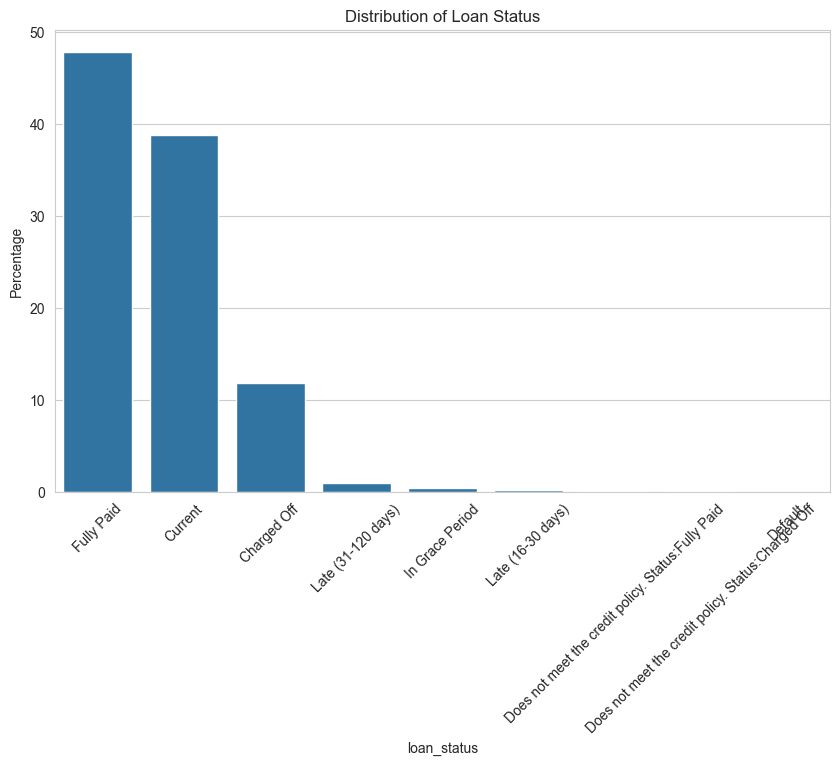

In [7]:
# 2. Analyze the Target Variable (loan_status)
print("Analyzing the 'loan_status' column...")
status_counts = df['loan_status'].value_counts(normalize=True) * 100
print(status_counts)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.index, y=status_counts.values)
plt.title('Distribution of Loan Status')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

In [9]:
# --- Task 2.2: Feature Engineering & Preprocessing ---

# 1. Create the Target Variable (y)
print("Filtering for final loan statuses...")
# Define the statuses we care about
final_statuses_map = {
    'Fully Paid': 0,
    'Charged Off': 1,
    'Default': 1  # 'Default' is also explicitly a defaulted state
}

# Filter the DataFrame
df_final = df[df['loan_status'].isin(final_statuses_map.keys())].copy()

# Create the binary target variable 'is_default'
df_final['is_default'] = df_final['loan_status'].map(final_statuses_map)

# Check the new distribution
print(f"Original sample size: {df.shape[0]}")
print(f"Filtered final size: {df_final.shape[0]}")
print("\nDistribution of final binary target 'is_default':")
print(df_final['is_default'].value_counts(normalize=True)*100)

Filtering for final loan statuses...
Original sample size: 149998
Filtered final size: 89427

Distribution of final binary target 'is_default':
is_default
0    80.258759
1    19.741241
Name: proportion, dtype: float64


In [10]:
# 2. Feature Selection (X)
# Justification: We select features that are known at the time of application
# and are likely to predict risk.
# We exclude 'leaky' features (like 'total_pymnt') or post-approval features.

# We will need these features for the Reward (Task 3)
# 'loan_amnt', 'int_rate'
# We will need the target for the Reward (Task 3)
# 'is_default'

features = [
    # Core loan details
    'loan_amnt',       # The amount requested
    'int_rate',        # Interest rate (risk premium)
    'term',            # ' 36 months' or ' 60 months'
    
    # Borrower details
    'grade',           # LC grade
    'emp_length',      # Employment length
    'home_ownership',  # 'MORTGAGE', 'RENT', 'OWN'
    'annual_inc',      # Annual income
    'verification_status', # Income verification
    
    # Borrower risk metrics
    'dti',             # Debt-to-income ratio
    'open_acc',        # Number of open credit lines
    'pub_rec',         # Number of derogatory public records
    'revol_bal',       # Total revolving balance
    'revol_util',      # Revolving line utilization rate
]

# Separate our features (X) and target (y)
y = df_final['is_default']
X = df_final[features]

print(f"Selected {len(features)} features. X shape: {X.shape}, y shape: {y.shape}")
X.head()

Selected 13 features. X shape: (89427, 13), y shape: (89427,)


,loan_amnt,int_rate,term,grade,emp_length,home_ownership,annual_inc,verification_status,dti,open_acc,pub_rec,revol_bal,revol_util
1,28000.0,11.53,36 months,B,10+ years,MORTGAGE,85000.0,Not Verified,21.33,30.0,0.0,18805.0,26.0
2,10500.0,5.32,36 months,A,6 years,MORTGAGE,84000.0,Not Verified,14.09,16.0,0.0,23200.0,43.9
3,14400.0,12.59,36 months,C,5 years,RENT,80000.0,Source Verified,17.90,14.0,1.0,13915.0,76.9
4,35000.0,22.99,60 months,F,10+ years,OWN,120000.0,Source Verified,24.41,19.0,0.0,56735.0,66.4
5,7500.0,12.59,36 months,C,7 years,MORTGAGE,32000.0,Source Verified,24.23,5.0,0.0,3181.0,70.7


In [11]:
# 3. Define Preprocessing Pipelines
# We need to handle numeric and categorical features separately.

# Identify feature types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
# 'int_rate' is numeric, but let's drop it from this list for a moment
# to handle it as a special case (it's needed raw for reward)
# No, we preprocess it. We use the original df_final for reward.
print(f"Numeric features: {numeric_features}")

categorical_features = X.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical features: {categorical_features}")


# Create the pipeline for numeric features:
# 1. Impute missing values with the median
# 2. Scale features to have zero mean and unit variance
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Create the pipeline for categorical features:
# 1. Impute missing values with the most frequent value
# 2. One-hot encode the categories
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine these pipelines into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # In case we missed any
)

Numeric features: ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util']
Categorical features: ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status']


In [12]:
# 4. Split the Data (BEFORE applying the pipeline)
# We split first to prevent data leakage from the test set into our
# imputer/scaler (e.g., learning the test set's median).

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,    # 20% for the test set
    random_state=42,  # For reproducibility
    stratify=y        # Ensure train/test have similar class distribution
)

print(f"X_train_raw shape: {X_train_raw.shape}")
print(f"X_test_raw shape: {X_test_raw.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train_raw shape: (71541, 13)
X_test_raw shape: (17886, 13)
y_train shape: (71541,)
y_test shape: (17886,)


In [13]:
# 5. Apply the Preprocessing Pipeline
# We fit the preprocessor on the TRAINING data only
# Then we transform both training and test data

print("Fitting preprocessor on training data...")
X_train = preprocessor.fit_transform(X_train_raw)

print("Transforming test data...")
X_test = preprocessor.transform(X_test_raw)

# The output of ColumnTransformer is a numpy array
print(f"\nProcessed X_train shape: {X_train.shape}")
print(f"Processed X_test shape: {X_test.shape}")

# We also need to save the raw (but filtered) data for the RL part,
# as the RL environment needs the un-scaled 'loan_amnt' and 'int_rate'
# for the reward calculation. Let's re-join the X_raw and y
# for the train/test sets so we can pass them to the next phase.

train_data_rl = X_train_raw.copy()
train_data_rl['is_default'] = y_train

test_data_rl = X_test_raw.copy()
test_data_rl['is_default'] = y_test

print(f"\nShape of combined train data for RL: {train_data_rl.shape}")
print(f"Shape of combined test data for RL: {test_data_rl.shape}")

print("\n--- Phase 2 (EDA & Preprocessing) is complete. ---")

Fitting preprocessor on training data...
Transforming test data...

Processed X_train shape: (71541, 37)
Processed X_test shape: (17886, 37)

Shape of combined train data for RL: (71541, 14)
Shape of combined test data for RL: (17886, 14)

--- Phase 2 (EDA & Preprocessing) is complete. ---


In [14]:
# --- ADD THIS CELL TO THE END OF 01-eda-preprocessing.ipynb ---
import joblib

# Save the processed data
data_to_save = {
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test,
    'preprocessor': preprocessor, # Save the fitted preprocessor
    'train_data_rl': train_data_rl, # Save the data for Phase 4
    'test_data_rl': test_data_rl   # Save the data for Phase 4
}

# Create a directory to store data artifacts
!mkdir -p artifacts
joblib.dump(data_to_save, 'artifacts/preprocessed_data.joblib')

print("All processed data and preprocessor saved to 'artifacts/preprocessed_data.joblib'")

All processed data and preprocessor saved to 'artifacts/preprocessed_data.joblib'
